In [2]:
import sys
import os
# Go three levels up from current file (i.e., from notebooks/ to project/)
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '../..')))
import numpy as np
import matplotlib.pyplot as plt
import utils.mpl_pubstyle  # noqa: F401
import re, glob


# Plot convergence for IMEX-RB on 2D nonlinear problem
We study convergence on the 2D viscous Burgers equation

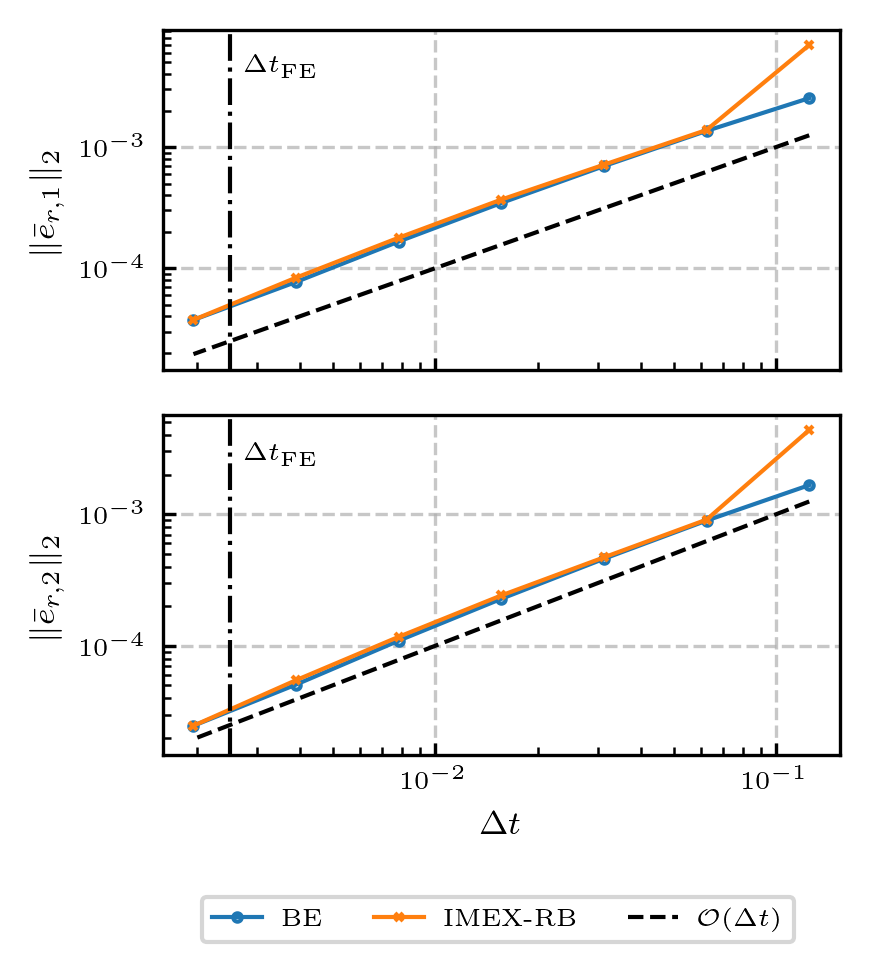

In [7]:
# Retrieve data
base_dir = os.path.abspath(os.path.join(os.getcwd(), ''))

# Paths
problem_name = "Burgers2D"
test_name = "convergence"
# Find results
results_base = os.path.join(base_dir, os.pardir, os.pardir, '__RESULTS', problem_name)
convergence_dirs = glob.glob(os.path.join(results_base, f'{test_name}*'))
latest_num = max([int(re.search(rf'{test_name}(\d+)', os.path.basename(d)).group(1)) for d in convergence_dirs])
results_path = os.path.join(results_base, f'{test_name}{latest_num}', 'results.npz')

plots_dir = os.path.join(base_dir, 'plots')
os.makedirs(plots_dir, exist_ok=True)

data = np.load(results_path, allow_pickle=True)
errors_l2 = data['errors_l2'].item()
Nt_values = data['Nt_values']

dts = 1.0 / np.array(Nt_values)
methods = ['BE', 'IMEX-RB']
comp_labels = ['u_x', 'u_y']
markers_list = ['o', 'x']
fill_list = ['none', 'full']

# Create subplot with shared x-axis
fig, axes = plt.subplots(2, 1, figsize=(3, 3), sharex=True)

# Loop over the two components of velocity
for comp in range(errors_l2[methods[0]].shape[0]):
    ax = axes[comp]
    
    for m_idx, m in enumerate(methods):
        errs = errors_l2[m][comp]
        ax.loglog(dts, errs, marker=markers_list[m_idx],
                  fillstyle=fill_list[m_idx], label=m)
    
    # Reference line
    ax.loglog(dts, [dt/100.0 for dt in dts],
              label=r"$\mathcal{O}(\Delta t)$",
              color="k", linestyle='--')
    ax.axvline(1/400, color="k", linestyle='-.')
    ax.text(1/400 * 1.1, ax.get_ylim()[1] * 0.5, rf'$\Delta t_{{\mathrm{{FE}}}}$', 
            rotation=0, verticalalignment='center', color='k', fontsize=6)
    
    # Only add xlabel to bottom subplot
    if comp == 1:
        ax.set_xlabel(r'$\Delta t$')
    ax.set_ylabel(fr'$\|\bar{{e}}_{{r,{comp+1}}}\|_2$')

# Add single legend at the bottom
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, bbox_to_anchor=(0.57, -0.0), loc='upper center', ncol=3)

plt.tight_layout()
out_file = os.path.join(plots_dir, f'{problem_name}_convergence_combined.pdf')
plt.savefig(out_file, bbox_inches='tight')
plt.show()